In [4]:
import time
from functools import lru_cache
from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
import requests

In [5]:
def get_data():# zelfde datums als Schoof I:  https://partijgedrag.nl/party-likeness
    from_date = "2024-07-01T23:59:59.99Z"
    to_date = "2025-11-12T23:59:59.99Z"

    base = "https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Stemming"
    params = {
        "$filter": f"Verwijderd eq false and (GewijzigdOp gt {from_date}) and (GewijzigdOp lt {to_date})",
        "$orderby": "GewijzigdOp desc",
    }

    all_entries = list()
    next_link = None
    i = 0
    while True:
        print(i)  # track progress
        i += 1

        if next_link is None:
            r = requests.get(base, params=params).json()
        else:
            r = requests.get(next_link).json()

        try:
            next_link = r["@odata.nextLink"]
        except KeyError:
            break
        all_entries.extend(r["value"])


    new_data = pd.DataFrame(all_entries)

    timestamp = int(time.time())
    new_data.to_csv(f"{timestamp}.csv", index=False)

# get_data()

In [6]:
df = pd.read_csv("1762947551.csv")

In [7]:
df.head()

,Id,Besluit_Id,Soort,FractieGrootte,ActorNaam,ActorFractie,Vergissing,SidActorLid,SidActorFractie,Persoon_Id,Fractie_Id,GewijzigdOp,ApiGewijzigdOp,Verwijderd
0,e55084c3-df92-40f5-a5d8-340ddf70aba3,c30d38b0-fd9a-49ae-9568-0467abe56edc,Voor,5,SP,SP,False,NaN,S-1-365867521-2120874753-3918075670-1133036099...,NaN,a3689bb6-3914-4d5c-a6a8-42e24582e299,2025-10-17T09:03:28.75+02:00,2025-10-17T07:03:34.0634856Z,False
1,9fa94c66-be5f-4d3f-ac7d-72f952052875,c30d38b0-fd9a-49ae-9568-0467abe56edc,Voor,3,PvdD,PvdD,False,NaN,S-1-365867521-2120874753-3375217526-1184288014...,NaN,d3b4d880-ef37-4ce6-99ec-4940266ac466,2025-10-17T09:03:28.75+02:00,2025-10-17T07:03:35.1334164Z,False
2,c4e99978-1cb1-46f4-83cf-9566cace0cab,c30d38b0-fd9a-49ae-9568-0467abe56edc,Voor,3,FVD,FVD,False,NaN,S-1-365867521-2120874753-318435223-1117601640-...,NaN,e0b7b638-de3c-47cc-85bd-341dd65ea33d,2025-10-17T09:03:28.75+02:00,2025-10-17T07:03:35.1075226Z,False
3,4a2eb31c-8787-4d11-980d-b5c9c6db53c6,c30d38b0-fd9a-49ae-9568-0467abe56edc,Voor,25,GroenLinks-PvdA,GroenLinks-PvdA,False,NaN,S-1-365867521-2120874753-4073584695-1095381795...,NaN,0208097d-ef04-438a-8c29-eebb84956204,2025-10-17T09:03:28.75+02:00,2025-10-17T07:03:34.0711157Z,False
4,9049b91e-6b8c-4c06-be5a-f1216b15d811,c30d38b0-fd9a-49ae-9568-0467abe56edc,Voor,2,Volt,Volt,False,NaN,S-1-365867521-2120874753-4235502623-1217496042...,NaN,ae48391e-ce4d-47e0-86e3-ee310282f66f,2025-10-17T09:03:28.75+02:00,2025-10-17T07:03:35.098111Z,False


In [8]:
df.duplicated(
    subset=[
        # "Id",
        "Besluit_Id",
        "Soort",
        "FractieGrootte",
        "ActorNaam",
        "ActorFractie",
        "Vergissing",
        "SidActorLid",
        "SidActorFractie",
        "Persoon_Id",
        "Fractie_Id",
        # "GewijzigdOp",
        # "ApiGewijzigdOp",
        "Verwijderd",
    ]
).sum()

np.int64(15)

In [9]:
# een besluit staat er volledig dubbel in.

df[
    df.duplicated(
        subset=[
            # "Id",
            "Besluit_Id",
            "Soort",
            "FractieGrootte",
            "ActorNaam",
            "ActorFractie",
            "Vergissing",
            "SidActorLid",
            "SidActorFractie",
            "Persoon_Id",
            "Fractie_Id",
            # "GewijzigdOp",
            # "ApiGewijzigdOp",
            "Verwijderd",
        ]
    )
]

,Id,Besluit_Id,Soort,FractieGrootte,ActorNaam,ActorFractie,Vergissing,SidActorLid,SidActorFractie,Persoon_Id,Fractie_Id,GewijzigdOp,ApiGewijzigdOp,Verwijderd
21,84494481-333a-47c5-96a4-10e86b370b81,78643134-c367-44c3-8a93-b34ef03219dc,Voor,25,GroenLinks-PvdA,GroenLinks-PvdA,False,NaN,S-1-365867521-2120874753-4073584695-1095381795...,NaN,0208097d-ef04-438a-8c29-eebb84956204,2025-10-17T09:03:18.71+02:00,2025-10-17T07:03:23.773737Z,False
27,d8b8f7ff-bcb0-4bd9-9f1e-9df6fafdf8f1,78643134-c367-44c3-8a93-b34ef03219dc,Tegen,8,BBB,BBB,False,NaN,S-1-365867521-2120874753-3989062109-1173306659...,NaN,626555ac-e836-44e3-9978-a6a7f0abc3ce,2025-10-17T09:03:18.71+02:00,2025-10-17T07:03:22.3176361Z,False
29,6faf7296-1f67-4b5c-beeb-b5c8d5e259d6,78643134-c367-44c3-8a93-b34ef03219dc,Voor,2,Volt,Volt,False,NaN,S-1-365867521-2120874753-4235502623-1217496042...,NaN,ae48391e-ce4d-47e0-86e3-ee310282f66f,2025-10-17T09:03:18.71+02:00,2025-10-17T07:03:22.3326329Z,False
33,9a60a281-f0c2-461b-8089-0e97f014e0ca,78643134-c367-44c3-8a93-b34ef03219dc,Voor,3,DENK,DENK,False,NaN,S-1-365867521-2120874753-3073972497-1296662242...,NaN,deb74bb5-63a9-4ffc-98ed-af577167452e,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.1815284Z,False
34,8ba5db65-9a35-4b2b-94e4-118eec4e1064,78643134-c367-44c3-8a93-b34ef03219dc,Tegen,3,FVD,FVD,False,NaN,S-1-365867521-2120874753-318435223-1117601640-...,NaN,e0b7b638-de3c-47cc-85bd-341dd65ea33d,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.2211639Z,False
35,a696b2c1-e83b-470e-bcd2-2484bbd75a82,78643134-c367-44c3-8a93-b34ef03219dc,Voor,24,VVD,VVD,False,NaN,S-1-365867521-2120874753-2712795160-1237583058...,NaN,7476e97a-3243-4122-9df6-ba7d82a5279b,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.189243Z,False
36,140ea9c5-9f1d-499f-8c7f-334d67d66ba9,78643134-c367-44c3-8a93-b34ef03219dc,Tegen,37,PVV,PVV,False,NaN,S-1-365867521-2120874753-203711267-1259409971-...,NaN,65129918-f256-4975-9da4-488da34d6695,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.1721706Z,False
37,476a8918-4c11-4c0a-a15a-7e1cfe0c1189,78643134-c367-44c3-8a93-b34ef03219dc,Voor,5,SP,SP,False,NaN,S-1-365867521-2120874753-3918075670-1133036099...,NaN,a3689bb6-3914-4d5c-a6a8-42e24582e299,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.277367Z,False
38,f2bc1934-38af-48b6-9195-88e55b34bbde,78643134-c367-44c3-8a93-b34ef03219dc,Voor,3,PvdD,PvdD,False,NaN,S-1-365867521-2120874753-3375217526-1184288014...,NaN,d3b4d880-ef37-4ce6-99ec-4940266ac466,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.286583Z,False
39,30edfa96-40ac-42dd-ab27-b0d83190ffb8,78643134-c367-44c3-8a93-b34ef03219dc,Voor,3,ChristenUnie,ChristenUnie,False,NaN,S-1-365867521-2120874753-1996180723-1207380569...,NaN,d720f5af-0516-408a-b830-0b6ffb8a581c,2025-10-17T09:03:18.707+02:00,2025-10-17T07:03:22.2384505Z,False


In [10]:
df.Soort.unique()

array(['Voor', 'Tegen', 'Niet deelgenomen'], dtype=object)

In [11]:
df.Soort.value_counts(dropna=False)

Soort
Voor                62128
Tegen               37193
Niet deelgenomen      679
Name: count, dtype: int64

In [12]:
df.groupby(['ActorNaam', 'ActorFractie']).size().sort_values(ascending=False)

ActorNaam           ActorFractie   
GroenLinks-PvdA     GroenLinks-PvdA    5857
DENK                DENK               5857
ChristenUnie        ChristenUnie       5857
FVD                 FVD                5857
NSC                 NSC                5857
                                       ... 
Raak van, A.A.G.M.  SP                    1
Schouten, C.J.      ChristenUnie          1
Smeulders, P.H.M.   GroenLinks            1
Voortman, L.G.J.    GroenLinks            1
Verhoeven, K.       D66                   1
Length: 191, dtype: int64

In [13]:
df.ActorNaam.value_counts(dropna=False)

ActorNaam
SP                     5857
PvdD                   5857
FVD                    5857
GroenLinks-PvdA        5857
Volt                   5857
                       ... 
Smeulders, P.H.M.         1
Raak van, A.A.G.M.        1
Kortenoeven, W.R.F.       1
Bergkamp, V.A.            1
Schouten, C.J.            1
Name: count, Length: 190, dtype: int64

In [14]:
# zonder alle individuele stemmen en duplicates
mask = df.ActorNaam == df.ActorFractie
mask_duplicate = df.duplicated(
    subset=[
        # "Id",
        "Besluit_Id",
        "Soort",
        "FractieGrootte",
        "ActorNaam",
        "ActorFractie",
        "Vergissing",
        "SidActorLid",
        "SidActorFractie",
        "Persoon_Id",
        "Fractie_Id",
        # "GewijzigdOp",
        # "ApiGewijzigdOp",
        "Verwijderd",
    ]
)
df2 = df.loc[mask & ~mask_duplicate]
df.shape, df2.shape

((100000, 14), (87837, 14))

In [15]:
df2.ActorFractie.value_counts(dropna=False)

ActorFractie
SP                 5856
PvdD               5856
FVD                5856
GroenLinks-PvdA    5856
Volt               5856
JA21               5856
SGP                5856
NSC                5856
PVV                5856
ChristenUnie       5856
VVD                5856
DENK               5856
CDA                5855
BBB                5855
D66                5855
Name: count, dtype: int64

In [16]:
# bij sommige partijen zijn mensen weggegaan.
df2.groupby(['ActorFractie']).FractieGrootte.unique()

ActorFractie
BBB                          [8, 7]
CDA                             [5]
ChristenUnie                    [3]
D66                             [9]
DENK                            [3]
FVD                          [3, 2]
GroenLinks-PvdA                [25]
JA21                            [1]
NSC                [19, 17, 20, 18]
PVV                            [37]
PvdD                            [3]
SGP                             [3]
SP                              [5]
VVD                    [24, 23, 22]
Volt                            [2]
Name: FractieGrootte, dtype: object

In [17]:
# verschillende stemmen binnen fracties (op hetzelfde besluit) ?
# nee. met alle hoofdelijke stemmen eruit, is er steeds een unieke stemsoort per fractie.
df2.groupby(['Besluit_Id', 'ActorFractie']).Soort.nunique().sort_values(ascending=False)

Besluit_Id                            ActorFractie
00074d39-69e9-4312-aa00-5ea2a857ad10  BBB             1
                                      CDA             1
                                      ChristenUnie    1
                                      D66             1
                                      DENK            1
                                                     ..
ffe5ade8-a3c7-45de-b3e9-e5d72196e768  PvdD            1
                                      SGP             1
                                      SP              1
                                      VVD             1
                                      Volt            1
Name: Soort, Length: 87837, dtype: int64

In [18]:
partijen = df2.ActorFractie.unique()
partijen.sort()
partijen

array(['BBB', 'CDA', 'ChristenUnie', 'D66', 'DENK', 'FVD',
       'GroenLinks-PvdA', 'JA21', 'NSC', 'PVV', 'PvdD', 'SGP', 'SP',
       'VVD', 'Volt'], dtype=object)

In [19]:
# zelfde volgorde als https://partijgedrag.nl/party-likeness

# BoerBurgerBeweging
# Christen-Democratisch Appèl
# ChristenUnie
# Democraten 66
# DENK
# Forum voor Democratie
# GroenLinks-PvdA
# JA21
# Nieuw Sociaal Contract
# Partij voor de Dieren
# Partij voor de Vrijheid
# Socialistische Partij
# Staatkundig Gereformeerde Partij
# Volkspartij voor Vrijheid en Democratie
# Volt

partijen = [
    "BBB",
    "CDA",
    "ChristenUnie",
    "D66",
    "DENK",
    "FVD",
    "GroenLinks-PvdA",
    "JA21",
    "NSC",
    "PvdD",
    "PVV",
    "SP",
    "SGP",
    "VVD",
    "Volt",
]

In [20]:
# in totaal 5856 unieke besluiten

df2.Besluit_Id.nunique()

5856

In [21]:
@lru_cache(None)
def get_ratio(partijen) -> float:
    if len(set(partijen)) == 1:
        return 1.0
    
    mask = df2.ActorFractie.isin(partijen)
    # om hetzelfde te stemmen moeten de partijen stemmen, én ze moeten hetzelfde stemmen
    allemaal_gestemd = df2[mask].groupby("Besluit_Id").ActorFractie.nunique().value_counts().loc[len(partijen)]
    hetzelfde = df2[mask].groupby("Besluit_Id").Soort.nunique().value_counts().loc[1]
    return hetzelfde / allemaal_gestemd

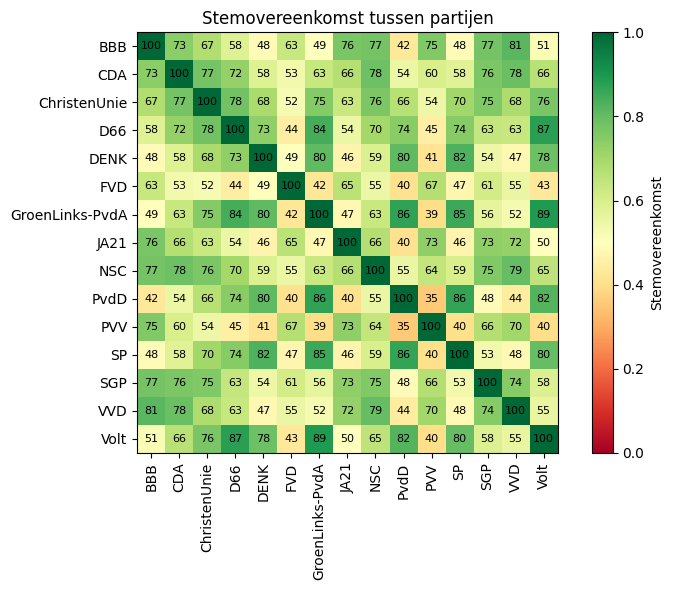

In [22]:
# Empty matrix
matrix = pd.DataFrame(index=partijen, columns=partijen, dtype=float)

# Fill it
for p1, p2 in product(partijen, repeat=2):
    matrix.loc[p1, p2] = get_ratio((p1, p2))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matrix.astype(float), cmap='RdYlGn', vmin=0, vmax=1)

# Add text labels
for i in range(len(partijen)):
    for j in range(len(partijen)):
        value = matrix.iloc[i, j]
        ax.text(j, i, f"{int(value*100):d}", ha='center', va='center', color='black', fontsize=8)

# Ticks and layout
ax.set_xticks(range(len(partijen)))
ax.set_yticks(range(len(partijen)))
ax.set_xticklabels(partijen, rotation=90)
ax.set_yticklabels(partijen)
plt.colorbar(im, label="Stemovereenkomst", ax=ax)
plt.title("Stemovereenkomst tussen partijen")
plt.tight_layout()
plt.show()


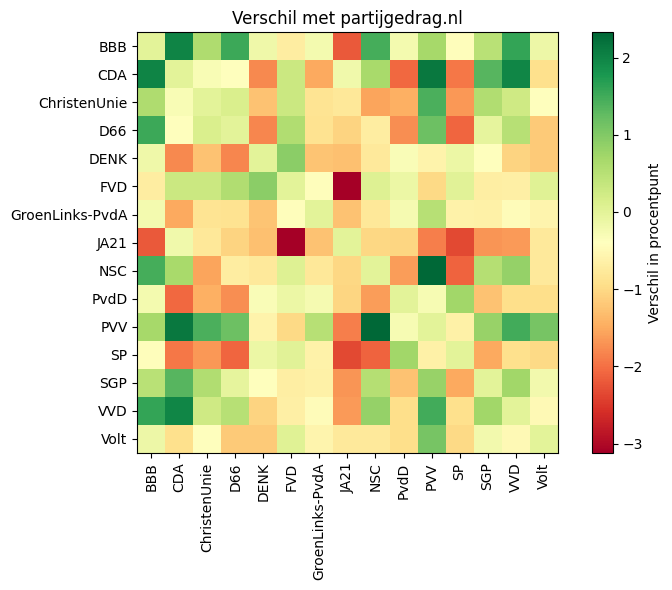

In [23]:
diff = (matrix.values - pd.read_csv("partijgedrag.csv").values[:, 1:]) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(diff.astype(float), cmap="RdYlGn")

# Ticks and layout
ax.set_xticks(range(len(partijen)))
ax.set_yticks(range(len(partijen)))
ax.set_xticklabels(partijen, rotation=90)
ax.set_yticklabels(partijen)
plt.colorbar(im, label="Verschil in procentpunt", ax=ax)
plt.title("Verschil met partijgedrag.nl")
plt.tight_layout()
plt.show()

In [25]:
combinations = [
    ("CDA", "D66", "JA21", "VVD"),
    ("CDA", "D66", "GroenLinks-PvdA", "VVD"),
    ("CDA", "ChristenUnie", "D66", "DENK", "GroenLinks-PvdA", "PvdD", "SP", "Volt"),
]

for combi in combinations:
    ratio = get_ratio(combi)
    print(combi, f'{ratio*100:.1f}')

('CDA', 'D66', 'JA21', 'VVD') 42.5
('CDA', 'D66', 'GroenLinks-PvdA', 'VVD') 46.0
('CDA', 'ChristenUnie', 'D66', 'DENK', 'GroenLinks-PvdA', 'PvdD', 'SP', 'Volt') 38.8
